## Imports

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Define standard variables

In [23]:
casual_riders_color_graph = 'gray';
member_riders_color_graph = 'black';

## Importing files

In [2]:
folder_path = 'archive'

file_names = [f'{folder_path}/{month}-divvy-tripdata.csv' for month in [
    "202104", "202105", "202106", "202107", "202108", "202109", 
    "202110", "202111", "202112", "202201", "202202", "202203"
]]

# reading and concatenating all files
df = pd.concat([pd.read_csv(file) for file in file_names], ignore_index=True)

# saving all files as a single file - only one time run -  if needed
df.to_csv('combined_divvy_tripdata.csv', index=False)


In [25]:
# general information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723532 entries, 0 to 5723531
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.7+ MB


## Data cleaning

In [26]:
# checking for totol null values in the dataframe
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745376
start_station_id      745373
end_station_name      796247
end_station_id        796247
start_lat                  0
start_lng                  0
end_lat                 4716
end_lng                 4716
member_casual              0
dtype: int64

In [27]:
# setting up date format
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# checking or calculating ride duration in a new column
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [28]:
# removing any ride having duration <= 0
df = df[df['ride_duration'] > 0]

In [29]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member,31.316667
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,64.300000
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,5697.650000
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member,25.100000
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,91.283333


In [30]:
# to see null values
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745351
start_station_id      745348
end_station_name      795806
end_station_id        795806
start_lat                  0
start_lng                  0
end_lat                 4716
end_lng                 4716
member_casual              0
ride_duration              0
dtype: int64

In [31]:
# handling missing values of stations names
df['start_station_name'].fillna("Unknown Station", inplace=True)
df['end_station_name'].fillna("Unknown Station", inplace=True)

In [32]:
# handling missing values of latitude and longitude
df = df.dropna(subset=['end_lat', 'end_lng'])

In [33]:
# to count # number of casual and member riders
casual_rides = (df['member_casual'] == 'casual').sum()
member_rides = (df['member_casual'] == 'member').sum()

print(f'Casual rides: {casual_rides}')
print(f'Member rides: {member_rides}')

# there are more member rides...

Casual rides: 2542544
Member rides: 3175613


### calculations for analysis

In [34]:
# getting the month (along with year) for each ride
df['month'] = df['started_at'].dt.strftime('%Y-%m')

# finding # number of rides per month and group them by member and casual
monthly_counts = df.groupby(['month', 'member_casual']).size().reset_index(name='count')

In [35]:
monthly_counts

,month,member_casual,count
0,2021-04,casual,136403
1,2021-04,member,200522
2,2021-05,casual,256549
3,2021-05,member,274578
4,2021-06,casual,370111
5,2021-06,member,358701
6,2021-07,casual,441428
7,2021-07,member,380169
8,2021-08,casual,412047
9,2021-08,member,391492


In [36]:
#  hour of rides per month
df['hour'] = df['started_at'].dt.hour  
hourly_trends = df.groupby(['hour', 'member_casual']).size().unstack()

In [37]:
# average duration for rides per month
monthly_duration = df.groupby(['month', 'member_casual'])['ride_duration'].mean().unstack()

In [40]:
# rideable type analysis
ride_type_used = df.groupby(['rideable_type', 'member_casual']).size().unstack()

ride_type_used = ride_type_used.fillna(0)
ride_type_used

member_casual,casual,member
rideable_type,,
classic_bike,1254327.0,1991837.0
docked_bike,303515.0,0.0
electric_bike,984702.0,1183776.0


In [41]:
ride_type_used_per_month = df.groupby(['month', 'member_casual'])['rideable_type'].value_counts().unstack()
ride_type_used_per_month = ride_type_used_per_month.fillna(0)

In [42]:
ride_type_used_per_month

rideable_type          classic_bike  docked_bike  electric_bike
month   member_casual                                          
2021-04 casual              70585.0      24713.0        41105.0
        member             143754.0          0.0        56768.0
2021-05 casual             123602.0      43352.0        89595.0
        member             185012.0          0.0        89566.0
2021-06 casual             187694.0      51715.0       130702.0
        member             246569.0          0.0       112132.0
2021-07 casual             240883.0      57698.0       142847.0
        member             265253.0          0.0       114916.0
2021-08 casual             229399.0      45065.0       137583.0
        member             272876.0          0.0       118616.0
2021-09 casual             195025.0      35337.0       133055.0
        member             266615.0          0.0       125413.0
2021-10 casual             105356.0      22689.0       128742.0
        member             210470.0          0.0       163415.0
2021-11 casual              31764.0       7560.0        67417.0
        member             122114.0          0.0       130846.0
2021-12 casual              19733.0       4878.0        44995.0
        member              80805.0          0.0        96964.0
2022-01 casual               6935.0        943.0        10582.0
        member              48064.0          0.0        37155.0
2022-02 casual               8068.0       1344.0        11947.0
        member              51282.0          0.0        42886.0
2022-03 casual              35283.0       8221.0        46132.0
        member              99023.0          0.0        95099.0

## Exploratory data analysis

In [43]:
# creating a pivot table for easy plotting
monthly_counts_pivot = monthly_counts.pivot(index='month', columns='member_casual', values='count')

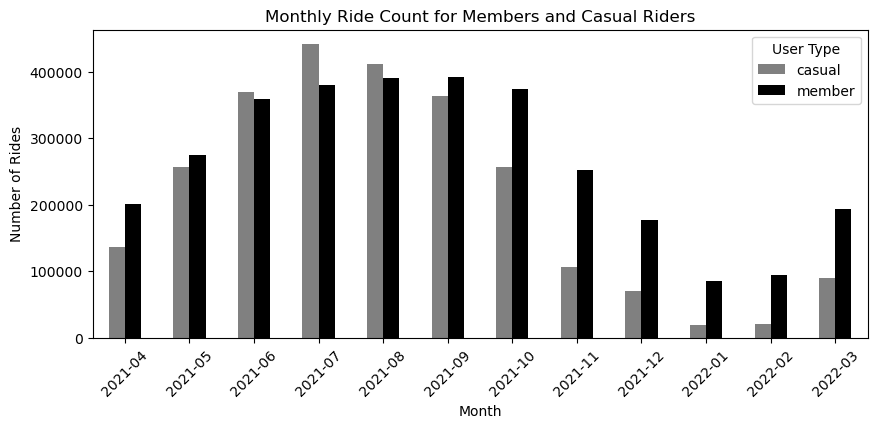

In [44]:
# examining casual and member rides per month
monthly_counts_pivot.plot(kind='bar', figsize=(10, 4), stacked=False, color=[casual_riders_color_graph, member_riders_color_graph])

plt.title('Monthly Ride Count for Members and Casual Riders')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title="User Type")
plt.show()

We see here, more number of members each month except June, July, and August. So casual rides increases in summer (maybe tourism).

And as a whole there are more rides from June to Octuber. 

Minimum number of rides in January (maybe due to snow/winter)

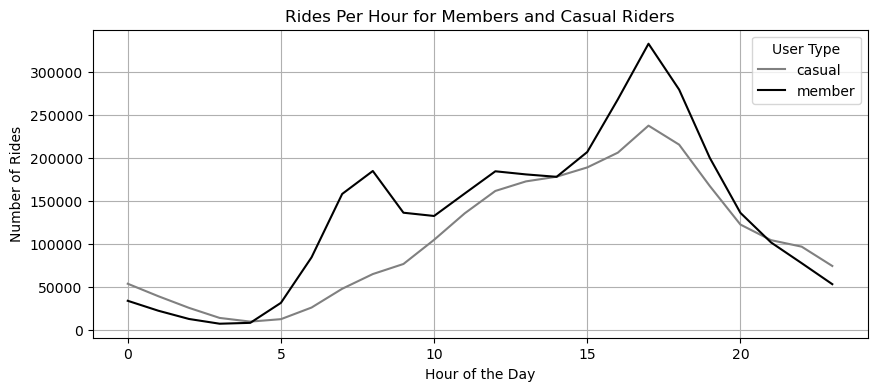

In [45]:
# to see # number of rides per hour casual or member rides take
hourly_trends.plot(kind='line', figsize=(10,4), color=[casual_riders_color_graph, member_riders_color_graph])

plt.title("Rides Per Hour for Members and Casual Riders")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.legend(title="User Type")
plt.grid()
plt.show()

Members (mostly) take more rides per hour than casual.

17th hour seems to be more busy


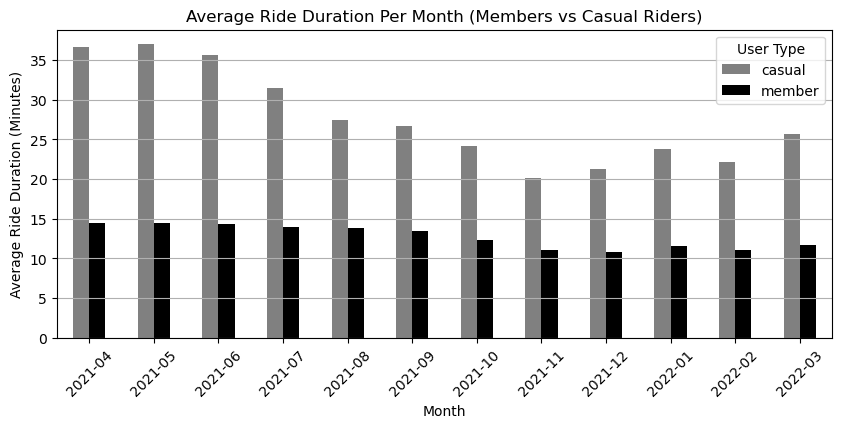

In [46]:
# to see how longer ride casual or member takes
monthly_duration.plot(kind='bar', figsize=(10, 4), stacked=False, color=[casual_riders_color_graph, member_riders_color_graph])

plt.title("Average Ride Duration Per Month (Members vs Casual Riders)")
plt.xlabel("Month")
plt.ylabel("Average Ride Duration (Minutes)")
plt.xticks(rotation=45)
plt.legend(title="User Type")
plt.grid(axis='y')
plt.show()

So, casual riders take longer rides then member riders...

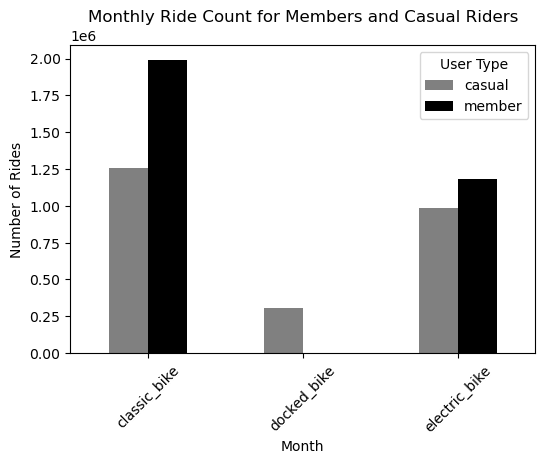

In [47]:
ride_type_used .plot(kind='bar', figsize=(6, 4), stacked=False, color=[casual_riders_color_graph, member_riders_color_graph])

plt.title('Monthly Ride Count for Members and Casual Riders')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title="User Type")
plt.show()

Classic bikes are used alot.

Docked bikes are least used (only by  causal riders)

Electric bikes are almost equally used

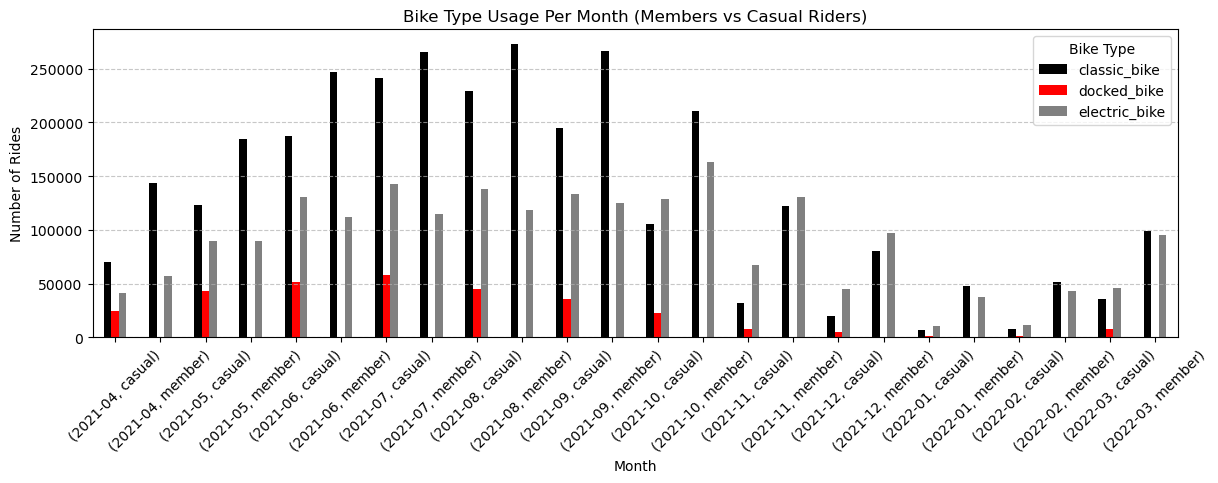

In [48]:
ride_type_used_per_month.plot(kind='bar', figsize=(14,4), stacked=False, color=['black', 'red', 'gray'])

plt.title("Bike Type Usage Per Month (Members vs Casual Riders)")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.legend(title="Bike Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Findings

#### Usage differences:
Casual riders tend to ride more in warmer months.
\
Annual members have consistent usage throughout the year.

#### Ride duration:
Casual riders generally have longer ride durations compared to members.
\
Members tend to use bikes for shorter, more frequent trips, possibly for commuting.

#### Bike type preferences:
Casual riders might prefer dockless bikes more often.
\
Members use standard bikes more frequently.

#### Peak usage times:
Members ride mostly during weekday mornings and evenings, suggesting commuting usage.
\
Casual riders are more active on weekends, likely for leisure.

## Recommendations

1- Offer discounted annual memberships during peak casual rider months and provide a "first-month free" membership trial for frequent casual users.

2- Use social media and app notifications to target casual riders who frequently rent bikes. Emphasize the cost savings of membership over single rides.

3- Provide exclusive access to premium bike options for members. Offer priority docking stations in high-traffic areas for members.
